In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [4]:
entrenamiento_df = pd.read_csv('dataset_v3')
entrenamiento_df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,count_families,damage_grade,roof_type_C1,roof_type_C0,...,has_superstructure_cement_mortar_stone_mean,has_superstructure_mud_mortar_brick_mean,has_superstructure_cement_mortar_brick_mean,has_superstructure_timber_mean,has_superstructure_bamboo_mean,has_superstructure_rc_non_engineered_mean,has_superstructure_rc_engineered_mean,has_superstructure_other_mean,area_percentage_norm,height_percentage_norm
0,802906,6,487,12198,2,30,1,3,0,1,...,0.981765,0.931846,0.924732,0.745012,0.914989,0.95741,0.984141,0.985015,0.050505,0.100000
1,28830,8,900,2812,2,10,1,2,0,1,...,0.981765,0.931846,0.924732,0.745012,0.914989,0.95741,0.984141,0.985015,0.070707,0.166667
2,94947,21,363,8973,2,10,1,3,0,1,...,0.981765,0.931846,0.924732,0.745012,0.914989,0.95741,0.984141,0.985015,0.040404,0.100000
3,590882,22,418,10694,2,10,1,2,0,1,...,0.981765,0.931846,0.924732,0.254988,0.085011,0.95741,0.984141,0.985015,0.050505,0.100000
4,201944,11,131,1488,3,30,1,3,0,1,...,0.981765,0.931846,0.924732,0.745012,0.914989,0.95741,0.984141,0.985015,0.070707,0.233333


In [5]:
entrenamiento_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 44 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   building_id                                  260601 non-null  int64  
 1   geo_level_1_id                               260601 non-null  int64  
 2   geo_level_2_id                               260601 non-null  int64  
 3   geo_level_3_id                               260601 non-null  int64  
 4   count_floors_pre_eq                          260601 non-null  int64  
 5   age                                          260601 non-null  int64  
 6   count_families                               260601 non-null  int64  
 7   damage_grade                                 260601 non-null  int64  
 8   roof_type_C1                                 260601 non-null  int64  
 9   roof_type_C0                                 260601 non-nul

In [6]:
test_df = pd.read_csv('encoded_test_values.csv')
test_df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,position_C0,position_C1,position_C2,plan_configuration_C0,plan_configuration_C1,plan_configuration_C2,plan_configuration_C3,legal_ownership_status_C0,legal_ownership_status_C1,legal_ownership_status_C2
0,300051,17,596,11307,3,20,7,6,t,r,...,0,1,0,1,0,0,0,1,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,0,1,0,1,0,0,0,1,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,1,0,1,0,0,0,1,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,1,0,0,1,0,0,0,1,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,1,0,0,1,0,0,0,1,0,0


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   building_id                             86868 non-null  int64 
 1   geo_level_1_id                          86868 non-null  int64 
 2   geo_level_2_id                          86868 non-null  int64 
 3   geo_level_3_id                          86868 non-null  int64 
 4   count_floors_pre_eq                     86868 non-null  int64 
 5   age                                     86868 non-null  int64 
 6   area_percentage                         86868 non-null  int64 
 7   height_percentage                       86868 non-null  int64 
 8   land_surface_condition                  86868 non-null  object
 9   foundation_type                         86868 non-null  object
 10  roof_type                               86868 non-null  object
 11  gr

In [8]:
test_df = test_df.drop(labels=['land_surface_condition','foundation_type','roof_type',\
'ground_floor_type','other_floor_type','position', 'plan_configuration','legal_ownership_status',\
 'has_secondary_use','has_secondary_use_agriculture','has_secondary_use_hotel','has_secondary_use_rental',\
'has_secondary_use_institution','has_secondary_use_school','has_secondary_use_industry','has_secondary_use_health_post',\
'has_secondary_use_gov_office','has_secondary_use_use_police','has_secondary_use_other'],axis=1)
test_df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,position_C0,position_C1,position_C2,plan_configuration_C0,plan_configuration_C1,plan_configuration_C2,plan_configuration_C3,legal_ownership_status_C0,legal_ownership_status_C1,legal_ownership_status_C2
0,300051,17,596,11307,3,20,7,6,0,1,...,0,1,0,1,0,0,0,1,0,0
1,99355,6,141,11987,2,25,13,5,0,1,...,0,1,0,1,0,0,0,1,0,0
2,890251,22,19,10044,2,5,4,5,0,1,...,0,1,0,1,0,0,0,1,0,0
3,745817,26,39,633,1,0,19,3,0,0,...,1,0,0,1,0,0,0,1,0,0
4,421793,17,289,7970,3,15,8,7,0,1,...,1,0,0,1,0,0,0,1,0,0


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   building_id                             86868 non-null  int64
 1   geo_level_1_id                          86868 non-null  int64
 2   geo_level_2_id                          86868 non-null  int64
 3   geo_level_3_id                          86868 non-null  int64
 4   count_floors_pre_eq                     86868 non-null  int64
 5   age                                     86868 non-null  int64
 6   area_percentage                         86868 non-null  int64
 7   height_percentage                       86868 non-null  int64
 8   has_superstructure_adobe_mud            86868 non-null  int64
 9   has_superstructure_mud_mortar_stone     86868 non-null  int64
 10  has_superstructure_stone_flag           86868 non-null  int64
 11  has_superstruct

In [10]:
X, y = entrenamiento_df.drop(['damage_grade'], axis=1), entrenamiento_df['damage_grade']

In [11]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=123)

In [12]:
#max_depth = 4
xg_cls = xgb.XGBClassifier(objective ='binary:logistic', 
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 4, alpha = 10, n_estimators = 100)

In [13]:
xg_cls.fit(X_train,y_train)


C:\Users\gamurrio\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:27:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [14]:
preds = xg_cls.predict(X_test)


In [15]:
accuracy = accuracy_score(y_test, preds)
trues = accuracy_score(y_test, preds, normalize=False)
print("Accuracy: %f" % (accuracy))
print("Acertados %i de %i" % (trues,preds.size))


Accuracy: 0.675793
Acertados 35223 de 52121


In [16]:
#max_depth = 5
xg_cls = xgb.XGBClassifier(objective ='binary:logistic', 
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
xg_cls.fit(X_train,y_train)
preds = xg_cls.predict(X_test)
accuracy = accuracy_score(y_test, preds)
trues = accuracy_score(y_test, preds, normalize=False)
print("Accuracy: %f" % (accuracy))
print("Acertados %i de %i" %(trues,preds.size))


[20:29:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.686038
Acertados 35757 de 52121


In [17]:
#max_depth = 3
xg_cls = xgb.XGBClassifier(objective ='binary:logistic', 
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 3, alpha = 10, n_estimators = 100)
xg_cls.fit(X_train,y_train)
preds = xg_cls.predict(X_test)
accuracy = accuracy_score(y_test, preds)
trues = accuracy_score(y_test, preds, normalize=False)
print("Accuracy: %f" % (accuracy))
print("Acertados %i de %i" %(trues,preds.size))

[20:31:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.661653
Acertados 34486 de 52121


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

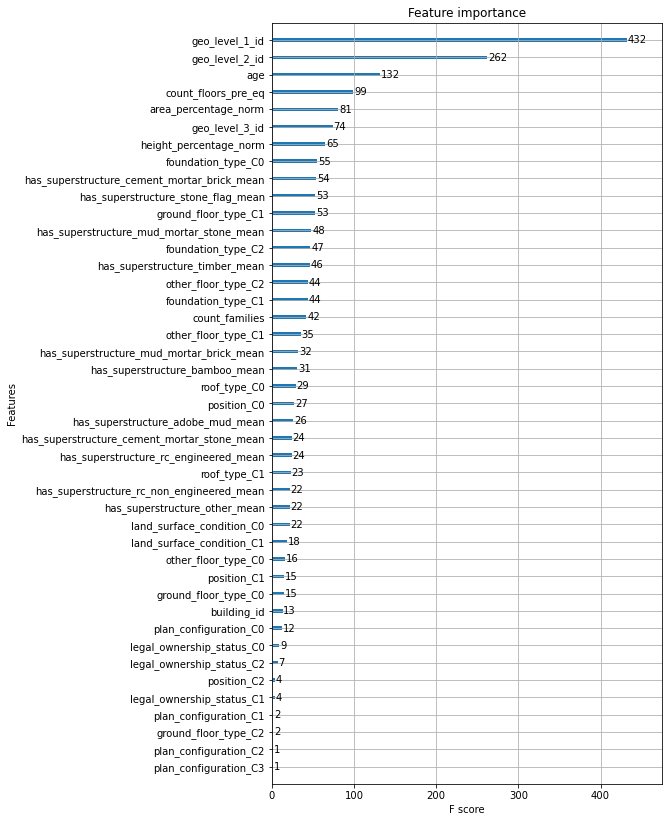

In [21]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7, 14)
xgb.plot_importance(xg_cls)


In [22]:
#max_depth = 7
xg_cls = xgb.XGBClassifier(objective ='binary:logistic', 
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 7, alpha = 10, n_estimators = 100)
xg_cls.fit(X_train,y_train)
preds = xg_cls.predict(X_test)
accuracy = accuracy_score(y_test, preds)
trues = accuracy_score(y_test, preds, normalize=False)
print("Accuracy: %f" % (accuracy))
print("Acertados %i de %i" %(trues,preds.size))

C:\Users\gamurrio\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:36:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.699411
Acertados 36454 de 52121


In [24]:
xg_cls = xgb.XGBClassifier(objective ='binary:logistic', 
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 7, alpha = 10, n_estimators = 100)
xg_cls.fit(X,y)
preds = xg_cls.predict(test_df)

[20:53:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [25]:
submit = pd.read_csv('submission_format.csv', index_col='building_id')
submission = pd.DataFrame(
    data=preds,
    columns=submit.columns,
    index=submit.index
)
submission.head()

,damage_grade
building_id,
300051,2
99355,2
890251,2
745817,2
421793,2


In [27]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86868 entries, 300051 to 501372
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   damage_grade  86868 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB


In [28]:
submission.to_csv('submissionXgboosts_max_depth_7.csv')